In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
data = pd.read_csv('Fraud.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [16]:
data['isFraud'].value_counts()
#so we will require sampling here

0.0    600250
1.0       361
Name: isFraud, dtype: int64

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,600612.000000,6.006120e+05,6.006110e+05,6.006110e+05,6.006110e+05,6.006110e+05,600611.000000,600611.0
mean,15.598055,1.610872e+05,8.872377e+05,9.070328e+05,9.731477e+05,1.136360e+06,0.000601,0.0
std,5.510990,2.691434e+05,2.953876e+06,2.990929e+06,2.315647e+06,2.473727e+06,0.024509,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.231929e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,15.000000,7.549022e+04,1.777800e+04,0.000000e+00,1.125947e+05,2.056730e+05,0.000000,0.0
75%,19.000000,2.150657e+05,1.567248e+05,1.955816e+05,8.897624e+05,1.168700e+06,0.000000,0.0
max,34.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [64]:
import plotly.express as px

type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()# These are the type of transactions done, mostly done through cash_out and payment

<Axes: xlabel='type', ylabel='amount'>

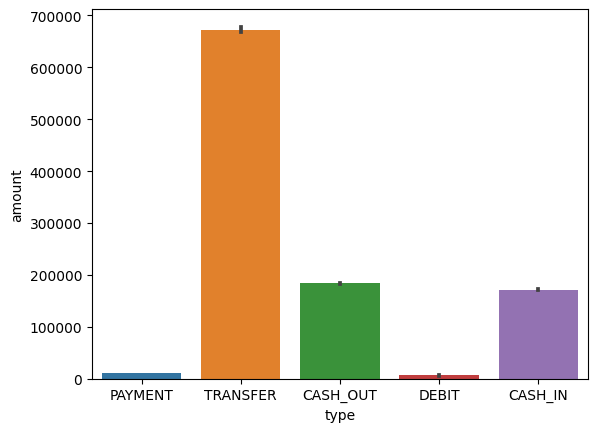

In [12]:
sns.barplot(x='type',y='amount', data=data)
#showing both cash_out and transfer are the biggest in count and amount.

In [40]:
import pandas as pd
from sklearn.utils import resample

# Separate the minority (fraudulent) and majority (non-fraudulent) classes
fraudulent = data[data['isFraud'] == 1]
non_fraudulent = data[data['isFraud'] == 0]

# Determine the desired balance ratio, e.g., 1:1
desired_ratio = 1.0

# Calculate the number of minority and majority samples needed for the desired ratio
n_minority_samples = len(fraudulent)
n_majority_samples = int(desired_ratio * n_minority_samples)

# Downsample the majority class to match the desired ratio
non_fraudulent_downsampled = resample(non_fraudulent, n_samples=n_majority_samples, random_state=42)

# Upsample the minority class to match the desired ratio
fraudulent_upsampled = resample(fraudulent, n_samples=n_majority_samples, replace=True, random_state=42)

# Concatenate the upsampled minority class with the downsampled majority class
df_balanced = pd.concat([non_fraudulent_downsampled, fraudulent_upsampled])

# Shuffle the rows in the balanced DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, df_balanced contains a balanced dataset with both upsampled and downsampled values.


In [43]:
df_balanced['isFraud'].value_counts()
data = df_balanced.copy()


In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


In [45]:
#Encoding
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,15,CASH_OUT,77415.27,C1140167522,0.00,0.00,C2080781909,242843.71,320258.98,0.0,0.0,1,0,0,0
1,8,CASH_OUT,89631.24,C1938531779,89631.24,0.00,C2048578791,21175.00,0.00,1.0,0.0,1,0,0,0
2,9,CASH_OUT,350705.74,C58527359,350705.74,0.00,C582901057,894760.68,1794033.65,1.0,0.0,1,0,0,0
3,11,PAYMENT,7796.08,C2071335666,1252718.62,1244922.54,M1745611,0.00,0.00,0.0,0.0,0,0,1,0
4,24,TRANSFER,986876.27,C1702714599,986876.27,0.00,C83459379,0.00,0.00,1.0,0.0,0,0,0,1


In [48]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']
X.shape, y.shape
#Dont want isFraud,type,nameOrig,nameDest in our x values for our model.

((722, 11), (722,))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [52]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model} : ')

    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training ROC-AUC : ', roc_auc_score(y_train, train_preds))

    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation ROC-AUC : ', roc_auc_score(y_test, y_preds))
    print()


LogisticRegression() : 
Training ROC-AUC :  0.9657056717542868
Validation ROC-AUC :  0.964059829059829

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training ROC-AUC :  1.0
Validation ROC-AUC :  0.9936752136752136

SVC(probability=True) : 
Training ROC-AUC :  0.836976320582878
Validation R

In [ ]:
#Receiver Operating Characteristic Area Under the Curve (ROC-AUC) is often a
#more informative metric than training and validation accuracy,
#especially in cases with imbalanced datasets or when the cost of false positives and false negatives varies significantly.

In [ ]:
#training and validation ROC-AUC are close to each other, indicating that the model generalizes well

In [61]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your XGBoost model (let's call it xgb_model)
xgb_model = models[1]

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix for XGBoost Classifier:")
print(cm)


Confusion Matrix for XGBoost Classifier:
[[100   0]
 [  6 111]]


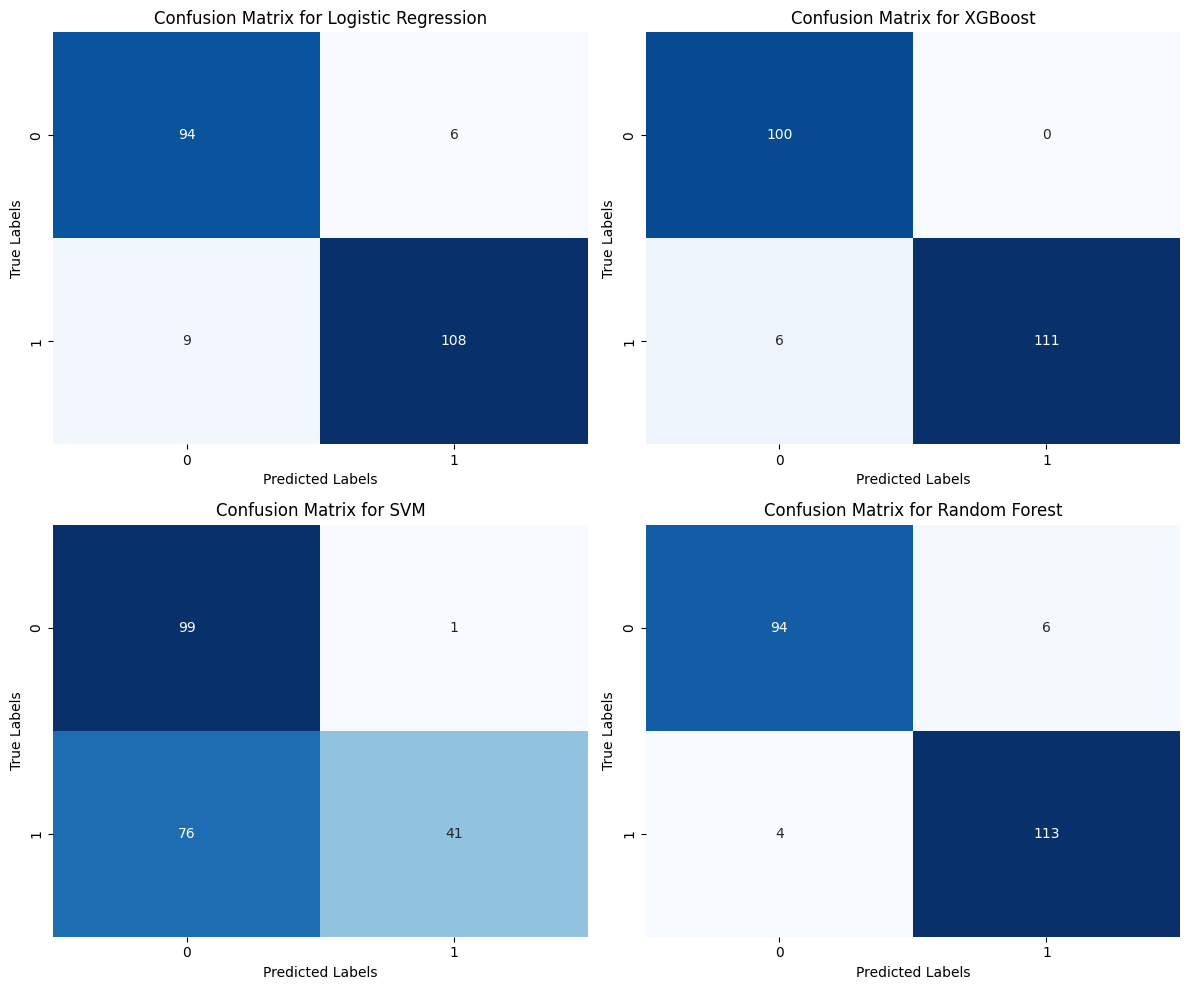

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of model names for labeling
model_names = ["Logistic Regression", "XGBoost", "SVM", "Random Forest"]

# Create a figure with a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, model in enumerate(models):
    # Calculate predictions for the current model
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix in the corresponding subplot
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title(f"Confusion Matrix for {model_names[i]}")

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()
